In [6]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')

## **Create Synthetic Dataset**

In [8]:
np.random.seed(20)
# centers of 4 classes
centers = [
    [ 1,  0],
    [ 0,  1],
    [-1,  0],
    [ 0, -1],
]

# colors to plot members of different classes
color_arr = ['r', 'b', 'g', 'y']

# number of instances per class
n_points = 2000
# these arrays will store information about datapoints
data_x = []
data_y = []
data_class = []
data_color = []
# standard deviation to generate the class examples
sigma = 0.8
# Generating data
print("###########################")
print("Begin data generation")
print("###########################")
for class_id in tqdm_notebook(range(0, len(centers))):
  x, y = centers[class_id]
  data_class.extend([class_id for j in range(0, n_points)])
  data_color.extend([color_arr[class_id] for j in range(0, n_points)])
  data_x.extend(np.random.normal(x, sigma, size = n_points))
  data_y.extend(np.random.normal(y, sigma, size = n_points))

df = pd.DataFrame({'x':data_x,
                   'y':data_y,
                   'class':data_class,
                   'color':data_color})

###########################
Begin data generation
###########################


  0%|          | 0/4 [00:00<?, ?it/s]

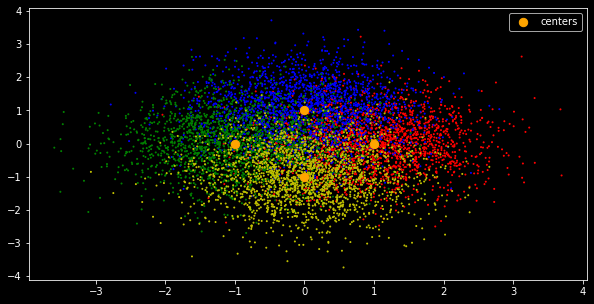

In [12]:
# Visualizing the synthetic data
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df.loc[:,'x'], df.loc[:,'y'], c = df['color'], s = 1)
ax.scatter(np.array(centers).T[0], np.array(centers).T[1], s= 70, c = 'orange', label = "centers")
ax.legend()
plt.show()

## **Classical Point Estimator**

In [13]:
# fraction of testing set 
test_frac = 0.1

np.random.seed(28)
# Shuffle the dataset and random draw
idx = np.random.permutation(len(df))
# Test-train partition
test_size = int(len(df) * 0.1)
train_size = len(df) - test_size
idx_train = idx[:train_size]
idx_test = idx[train_size:]

print('Size of training set: {}'.format(len(idx_train)))
print('Size of test set: {}'.format(len(idx_test)))

Size of training set: 7200
Size of test set: 800


In [14]:
names = ['Linear SVM', 'Decision Tree']
classifiers = [SVC(probability = True), 
               DecisionTreeClassifier(max_depth = 8)]
accuracy = []
print("Begin predicting")
for name, clf in zip(names, classifiers):
  clf.fit(df[['x', 'y']].values[idx_train, :], df['class'].values[idx_train])
  pred = clf.predict(df[['x', 'y']].values[idx_test, :])
  acc = sum(pred[:] == df['class'].values[idx_test][:]) / len(idx_test)
  accuracy.append(acc)

# displaying results
for acc, name in zip(accuracy, names):
  print('Accuracy of {} prediction: {}%'.format(name, acc * 100))

In [16]:
for acc, name in zip(accuracy, names):
  print('Accuracy of {} prediction: {}%'.format(name, acc * 100))

Accuracy of Linear SVM prediction: 65.0%
Accuracy of Decision Tree prediction: 61.5%
